In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install category_encoders

**1. Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import category_encoders as ce

import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split, cross_val_score

import warnings # supress warnings
warnings.filterwarnings('ignore')

# **K-Nearest Neighbor**

**2. Import Dataset**

In [ ]:
# lt_predict_pre = pd.read_csv('/content/drive/MyDrive/AI Tech/Project 2022/Laptop_Prediction_200.csv')
# lt_predict_pre = pd.read_csv('/content/drive/MyDrive/AI Tech/Project 2022/Laptop_Prediction_245.csv')
lt_predict_pre = pd.read_csv('/content/drive/MyDrive/AI Tech/Project 2022/Laptop_Prediction_345.csv')
lt_predict_pre = lt_predict_pre.dropna()
lt_predict_pre.head()

,No.,Brand,Series,Weight(kg),Width(cm),Depth(cm),Height(cm),Screen Size(inch),Display,Resolution,OS,CPU,GPU,RAM(GB),Processor Speed(GHz),Storage(GB),StorageType,Price(Baht)
0,1,Apple,MacBook Pro 16 Space Grey-32C GPU/32GB/2TB,2.2,35.57,24.81,1.68,16.2,IPS,3456x2234,macOS,Apple M1 Max,Apple M1 Max 32-Core GPU,32,4.0,2000,SSD,138900
1,2,Apple,MacBook Pro 16 Space Grey-32C GPU/32GB/1TB,2.2,35.57,24.81,1.68,16.2,IPS,3456x2234,macOS,Apple M1 Max,Apple M1 Max 32-Core GPU,32,4.0,1000,SSD,124900
2,3,Apple,MacBook Pro 16 Space Grey-16C GPU/16GB/1TB,2.1,35.57,24.81,1.68,16.2,IPS,3456x2234,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,1000,SSD,96900
3,4,Apple,MacBook Pro 16 Space Grey-16C GPU/16GB/512GB,2.1,35.57,24.81,1.68,16.2,IPS,3456x2234,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,512,SSD,89900
4,5,Apple,MacBook Pro 14 Silver-16C GPU/16GB/2TB,1.6,31.26,22.12,1.55,14.2,IPS,3024x1964,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,2000,SSD,103900


In [ ]:
print('Number of data: ' + str(lt_predict_pre.shape[0]) + ' laptops')
print('Number of features: ' + str(lt_predict_pre.shape[1]) + ' features\n')
lt_predict_pre.info()

Number of data: 345 laptops
Number of features: 18 features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 344
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No.                   345 non-null    int64  
 1   Brand                 345 non-null    object 
 2   Series                345 non-null    object 
 3   Weight(kg)            345 non-null    float64
 4   Width(cm)             345 non-null    float64
 5   Depth(cm)             345 non-null    float64
 6   Height(cm)            345 non-null    float64
 7   Screen Size(inch)     345 non-null    float64
 8   Display               345 non-null    object 
 9   Resolution            345 non-null    object 
 10  OS                    345 non-null    object 
 11  CPU                   345 non-null    object 
 12  GPU                   345 non-null    object 
 13  RAM(GB)               345 non-null    int64  
 14  Processor Spe

**3. Data Preprocessing**

**Remove Unnecessary Variables**

*   No.
*   Series
*   Brand








In [ ]:
lt_predict_mid = lt_predict_pre.copy()
lt_predict_mid.drop(['No.',
                 'Series',
                 'Brand'
                 ], axis = 1, inplace = True)
lt_predict_mid.head()

,Weight(kg),Width(cm),Depth(cm),Height(cm),Screen Size(inch),Display,Resolution,OS,CPU,GPU,RAM(GB),Processor Speed(GHz),Storage(GB),StorageType,Price(Baht)
0,2.2,35.57,24.81,1.68,16.2,IPS,3456x2234,macOS,Apple M1 Max,Apple M1 Max 32-Core GPU,32,4.0,2000,SSD,138900
1,2.2,35.57,24.81,1.68,16.2,IPS,3456x2234,macOS,Apple M1 Max,Apple M1 Max 32-Core GPU,32,4.0,1000,SSD,124900
2,2.1,35.57,24.81,1.68,16.2,IPS,3456x2234,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,1000,SSD,96900
3,2.1,35.57,24.81,1.68,16.2,IPS,3456x2234,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,512,SSD,89900
4,1.6,31.26,22.12,1.55,14.2,IPS,3024x1964,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,2000,SSD,103900


**Convert categorical variables to numerical variables**

Categorical variables
*   Resolution
*   StorageType







In [ ]:
print(len(lt_predict_mid.Resolution.unique()))
print(list(lt_predict_mid.Resolution.unique()))
print(len(lt_predict_mid.StorageType.unique()))
print(list(lt_predict_mid.StorageType.unique()))

16
['3456x2234', '3024x1964', '2560x1600', '1920x1080', '2560x1440', '3840x2160', '3072x1920', '1366x768', '3840x2400', '3456x2160', '4096x2160', '1920x1200', '2880x1800', '3000x2000', '2520x1680', '2160x1440']
3
['SSD', 'eMMC', 'HDD']


In [ ]:
cat_var =  ['Resolution',
            'StorageType'
            ]
def binary_map(x):
    return x.map({# Resolution 
                  '4096x2160': 15,
                  '3840x2400': 14,
                  '3840x2160': 13,
                  '3456x2234': 12,
                  '3456x2160': 11,
                  '3072x1920': 10,
                  '3024x1964': 9,
                  '3000x2000': 8,
                  '2880x1800': 7,
                  '2560x1600': 6,
                  '2560x1440': 5,
                  '2520x1680': 4,
                  '2160x1440': 3,
                  '1920x1200': 2,
                  '1920x1080': 1,
                  '1366x768': 0,
                  # StorageType
                  'SSD': 2, 'eMMC': 1, 'HDD': 0
                  })

lt_predict_mid[cat_var] = lt_predict_mid[cat_var].apply(binary_map)
lt_predict_mid.head()

,Weight(kg),Width(cm),Depth(cm),Height(cm),Screen Size(inch),Display,Resolution,OS,CPU,GPU,RAM(GB),Processor Speed(GHz),Storage(GB),StorageType,Price(Baht)
0,2.2,35.57,24.81,1.68,16.2,IPS,12,macOS,Apple M1 Max,Apple M1 Max 32-Core GPU,32,4.0,2000,2,138900
1,2.2,35.57,24.81,1.68,16.2,IPS,12,macOS,Apple M1 Max,Apple M1 Max 32-Core GPU,32,4.0,1000,2,124900
2,2.1,35.57,24.81,1.68,16.2,IPS,12,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,1000,2,96900
3,2.1,35.57,24.81,1.68,16.2,IPS,12,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,512,2,89900
4,1.6,31.26,22.12,1.55,14.2,IPS,9,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,2000,2,103900


**Feature Selection**

Text(0.5, 1.0, 'Laptop Price Variables Correlation')

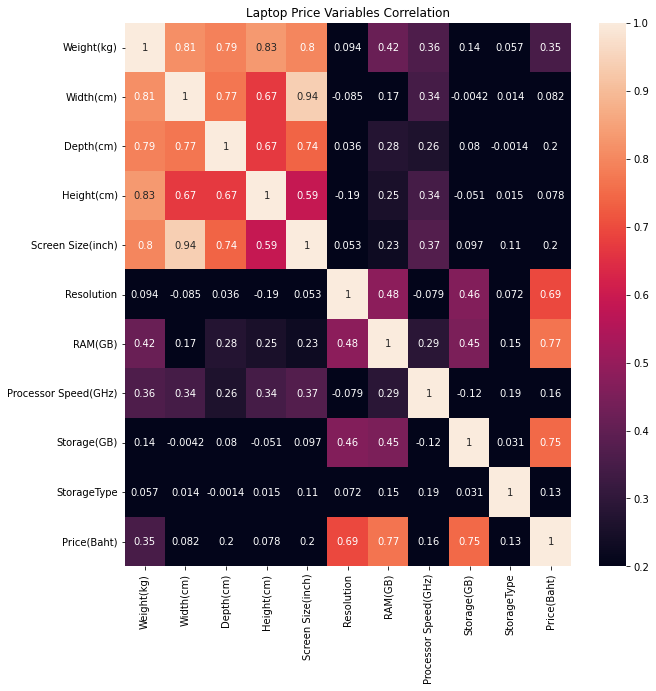

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(lt_predict_mid.corr(), vmin=0.2, annot=True, ax=ax)
plt.title('Laptop Price Variables Correlation')

In [ ]:
lt_predict = lt_predict_mid.copy()
lt_predict.drop(['Width(cm)',
                 'Height(cm)',
                 'StorageType',
                 'Display',
                 'CPU'
                 ], axis = 1, inplace = True)
lt_predict.head()

,Weight(kg),Depth(cm),Screen Size(inch),Resolution,OS,GPU,RAM(GB),Processor Speed(GHz),Storage(GB),Price(Baht)
0,2.2,24.81,16.2,12,macOS,Apple M1 Max 32-Core GPU,32,4.0,2000,138900
1,2.2,24.81,16.2,12,macOS,Apple M1 Max 32-Core GPU,32,4.0,1000,124900
2,2.1,24.81,16.2,12,macOS,Apple M1 Pro 16-Core GPU,16,3.4,1000,96900
3,2.1,24.81,16.2,12,macOS,Apple M1 Pro 16-Core GPU,16,3.4,512,89900
4,1.6,22.12,14.2,9,macOS,Apple M1 Pro 16-Core GPU,16,3.4,2000,103900


**4. Seperate the target variable**

In [ ]:
X = lt_predict.drop(['Price(Baht)'], axis = 1)
y = lt_predict['Price(Baht)']

print(X.shape)
print(y.shape)

(345, 9)
(345,)


**Data spltting to Train and Test sets**

In [ ]:
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=90)

**Dummy variables**







In [ ]:
encode = ce.OneHotEncoder(use_cat_names=True)
X_train = encode.fit_transform(X_train_pre)
X_test = encode.transform(X_test_pre)

In [ ]:
X_train

,Weight(kg),Depth(cm),Screen Size(inch),Resolution,OS_Windows 10 Home,OS_Windows 10 Pro,OS_Windows 11 Home,OS_macOS,OS_Chrome OS,OS_DOS,...,GPU_NVIDIA GeForce MX450,GPU_NVIDIA GeForce RTX SUPER,GPU_NVIDIA Quadro RTX 3000,GPU_NVIDIA GeForce GTX 1660,GPU_NVIDIA GeForce RTX2070,GPU_NVIDIA GeForce GTX 3060,GPU_NVIDIA RTX A3000,RAM(GB),Processor Speed(GHz),Storage(GB)
35,1.30,21.20,14.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,3.3,256
298,0.99,20.45,13.3,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,16,4.2,512
44,1.50,22.00,14.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,8,4.1,512
271,1.70,23.60,15.6,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,3.3,256
57,1.80,23.38,15.6,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,8,4.2,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,2.87,25.23,15.6,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,16,4.6,512
323,2.90,28.40,17.3,13,1,0,0,0,0,0,...,0,0,0,0,0,0,0,32,5.3,2000
159,1.38,21.90,13.3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,8,4.1,256
114,1.35,21.46,14.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,16,4.7,512


**5. Applying KNN**

In [ ]:
# Model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicting
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

# Performance and Overfitting
r2_test = cross_val_score(knn, X_test, y_test, scoring='r2', cv=5)
r2_test_score = r2_test.mean()
r2_train = cross_val_score(knn, X_train, y_train, scoring='r2', cv=5)
r2_train_score = r2_train.mean()

# Output
print('Performance score of test set: ' + str(r2_test_score))
print('Performance score of train set: ' + str(r2_train_score))
gap = r2_train_score-r2_test_score
print('Overfitting?: ' + str(gap))

Performance score of test set: 0.6597717035209698
Performance score of train set: 0.7807066116966386
Overfitting?: 0.12093490817566876


In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# Actual & Predicted Price

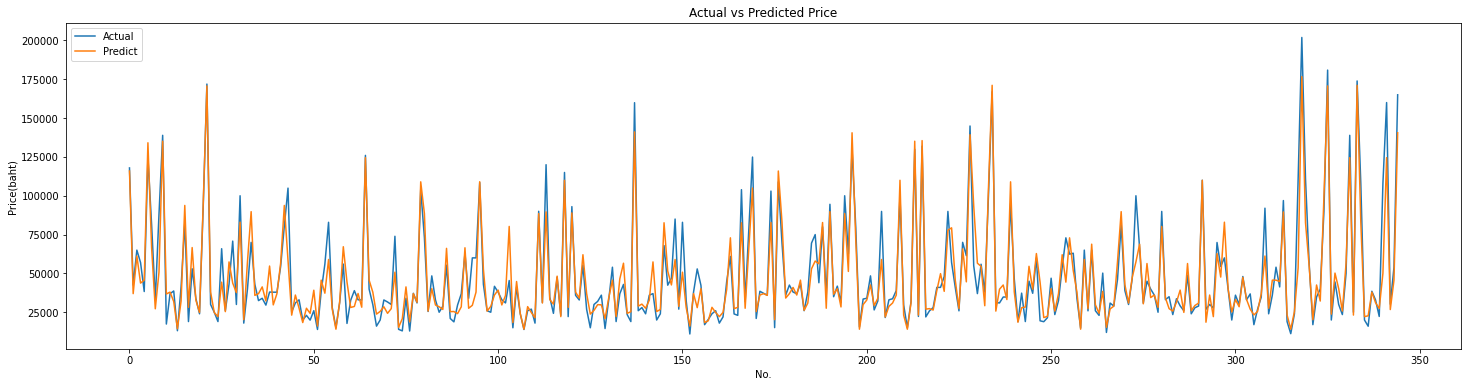

In [ ]:
actual = np.concatenate((y_test, y_train), axis=None)
predict = np.concatenate((y_pred_test, y_pred_train), axis=None)
pricedf = pd.DataFrame(data = ([actual, predict]), index = ['actual', 'predict']).transpose()

plt.figure(figsize=(25,6))

plt.plot(pricedf['actual'])
plt.plot(pricedf['predict'])
plt.xlabel('No.')
plt.ylabel('Price(baht)')
plt.title('Actual vs Predicted Price')
plt.legend(['Actual', 'Predict'], loc='upper left')

# **R2 score & Data size**

In [ ]:
X_kf = pd.concat([X_train, X_test], axis=0)
y_kf = pd.concat([y_train, y_test], axis=0)
lt = pd.concat([X_kf, y_kf], axis=1)

In [ ]:
score = []
for i in range(100,346,5):
  df = lt.sample(i, random_state=90)
  X = df.drop(['Price(Baht)'], axis = 1)
  y = df['Price(Baht)']
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=90)
  knn.fit(X_train, y_train)
  rscore = cross_val_score(knn, X_train, y_train, scoring='r2', cv=5).mean()
  score.append(rscore)

In [ ]:
scoredf = pd.DataFrame(data = ([score]), index = ['score'], columns = list(range(100,346,5))).transpose()

Text(0.5, 1.0, 'R2-Score Vs Data Size')

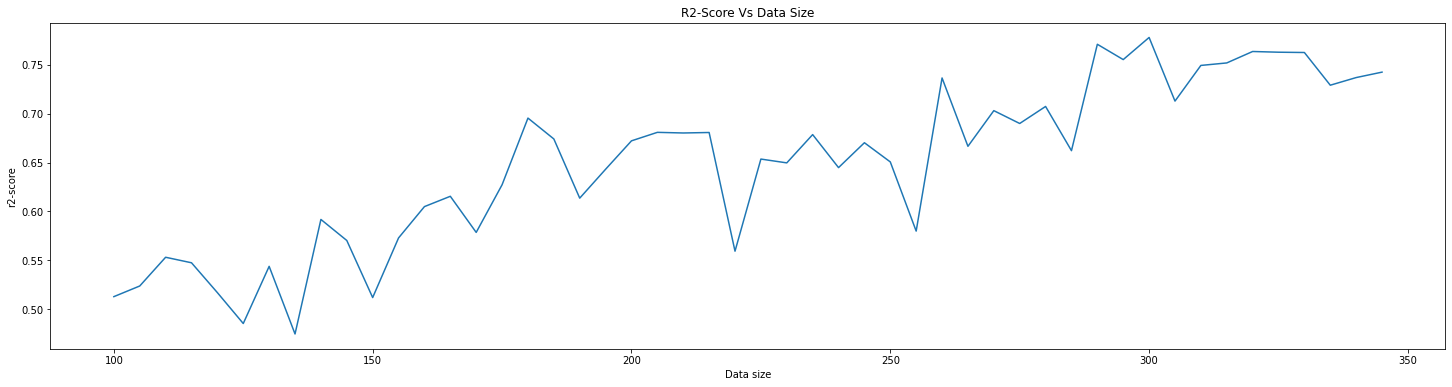

In [ ]:
plt.figure(figsize=(25,6))

plt.plot(scoredf['score'])
plt.xlabel('Data size')
plt.ylabel('r2-score')
plt.title('R2-Score Vs Data Size')

# **Price Prediction**

- '4096x2160': 15
- '3840x2400': 14
- '3840x2160': 13
- '3456x2234': 12
- '3456x2160': 11
- '3072x1920': 10
- '3024x1964': 9
- '3000x2000': 8
- '2880x1800': 7
- '2560x1600': 6
- '2560x1440': 5
- '2520x1680': 4
- '2160x1440': 3
- '1920x1200': 2
- '1920x1080': 1
- '1366x768': 0

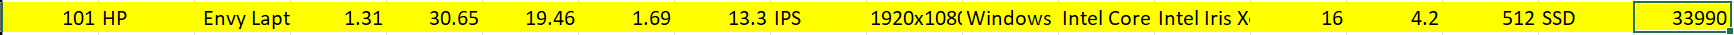

In [ ]:
laptop = pd.DataFrame([
    {
        'Weight(kg)': 1.31,
        'Depth(cm)': 19.46,
        'Screen Size(inch)': 13.3,
        'Resolution': 1,
        'OS' : 'Windows 11 Home',
        'GPU' : 'Intel Iris Xe Graphics',
        'RAM(GB)': 16,
        'Processor Speed(GHz)': 4.2,
        'Storage(GB)': 512
    }
])

X_cus = laptop[[
                'Weight(kg)',
                'Depth(cm)',
                'Screen Size(inch)',
                'Resolution',
                'OS',
                'GPU',
                'RAM(GB)',
                'Processor Speed(GHz)',
                'Storage(GB)']]
X_cus = encode.transform(X_cus)

y_pred = knn.predict(X_cus)
print('Price: 33990 baht\n' + 'Predicted Price: %d baht' % y_pred)
diff = y_pred-33990
print('Difference: %d baht' % diff)

Price: 33990 baht
Predicted Price: 39870 baht
Difference: 5880 baht


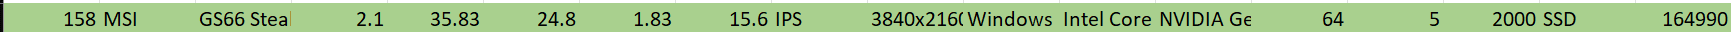

In [ ]:
laptop = pd.DataFrame([
    {
        'Weight(kg)': 2.1,
        'Depth(cm)': 24.8,
        'Screen Size(inch)': 15.6,
        'Resolution': 13,
        'OS' : 'Windows 11 Home',
        'GPU' : 'NVIDIA GeForce RTX 3080',
        'RAM(GB)': 64,
        'Processor Speed(GHz)': 5,
        'Storage(GB)': 2000
    }
])

X_cus = laptop[['Weight(kg)',
                'Depth(cm)',
                'Screen Size(inch)',
                'Resolution',
                'OS',
                'GPU',
                'RAM(GB)',
                'Processor Speed(GHz)',
                'Storage(GB)']]
X_cus = encode.transform(X_cus)

y_pred = knn.predict(X_cus)
print('Price: 164990 baht\n' + 'Predicted Price: %d baht' % y_pred)
diff = y_pred-164990
print('Difference: %d baht' % abs(diff))

Price: 164990 baht
Predicted Price: 134536 baht
Difference: 30454 baht


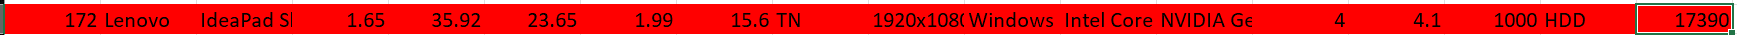

In [ ]:
laptop = pd.DataFrame([
    {
        'Weight(kg)': 1.65,
        'Depth(cm)': 23.65,
        'Screen Size(inch)': 15.6,
        'Resolution': 1,
        'OS' : 'Windows 11 Home',
        'GPU' : 'NVIDIA GeForce MX450',
        'RAM(GB)': 4,
        'Processor Speed(GHz)': 4.1,
        'Storage(GB)': 1000
    }
])

X_cus = laptop[['Weight(kg)',
                'Depth(cm)',
                'Screen Size(inch)',
                'Resolution',
                'OS',
                'GPU',
                'RAM(GB)',
                'Processor Speed(GHz)',
                'Storage(GB)']]
X_cus = encode.transform(X_cus)

y_pred = knn.predict(X_cus)
print('Price: 17390 baht\n' + 'Predicted Price: %d baht' % y_pred)
diff = y_pred-17390
print('Difference: %d baht' % diff)

Price: 17390 baht
Predicted Price: 39614 baht
Difference: 22224 baht
